In [52]:
from skimage.feature import hog
from skimage import data, color, exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.feature import graycomatrix, graycoprops

## HOG

In [2]:
def calculate_HOG(image):
    hog_features, hog_image = hog(
    image,
    orientations=9,         # Number of orientation bins
    pixels_per_cell=(8, 8), # Size (in pixels) of a cell
    cells_per_block=(2, 2), # Number of cells per block
    block_norm='L2-Hys',    # Block normalization method
    visualize=True,         # Generate a visual representation of the HOG
)
    return hog_features, hog_image

## Harris Corner Detector

In [31]:
def harris_corner_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the image to float32 format (required for cornerHarris)
    gray = np.float32(gray)

    # Apply Harris Corner Detector
    corner_response = cv2.cornerHarris(
        src=gray,         # Input grayscale image
        blockSize=2,      # Neighborhood size (2x2 window)
        ksize=3,          # Aperture parameter of Sobel derivative
        k=0.04            # Harris detector free parameter
    )

    # Dilate the corner response for better visibility
    corner_response_dilated = cv2.dilate(corner_response, None)

    # Set a threshold to identify strong corners
    threshold = 0.01 * corner_response_dilated.max()

    # Create a copy of the image for visualization
    image_with_corners = image.copy()

    # Highlight corners in red
    image_with_corners[corner_response_dilated > threshold] = [0, 0, 255]  # Red for RGB
    return image_with_corners

## SIFT

In [50]:
def calculate_SIFT(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a SIFT detector object
    sift = cv2.SIFT_create()

    # Detect keypoints and compute their descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Draw the keypoints on the original image
    image_with_keypoints = cv2.drawKeypoints(
        image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Output the number of keypoints and descriptor details
    print(f"Number of keypoints detected: {len(keypoints)}")
    print(f"Shape of descriptor array: {descriptors.shape}")

    return image_with_keypoints

## GLCM

In [53]:
# Compute the GLCM
def calculate_GLCM(image):
    distances = [1]  # Pixel distance
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135° directions
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Extract GLCM properties
    contrast = graycoprops(glcm, 'contrast')
    energy = graycoprops(glcm, 'energy')
    homogeneity = graycoprops(glcm, 'homogeneity')
    correlation = graycoprops(glcm, 'correlation')

    # Print GLCM properties
    print("GLCM Properties:")
    print(f"Contrast: {contrast}")
    print(f"Energy: {energy}")
    print(f"Homogeneity: {homogeneity}")
    print(f"Correlation: {correlation}")

## SHOW

In [48]:
def show_HOG(image, second, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(second, cmap=plt.cm.gray)
    ax2.set_title(title)
    ax2.axis('off')

    plt.show()

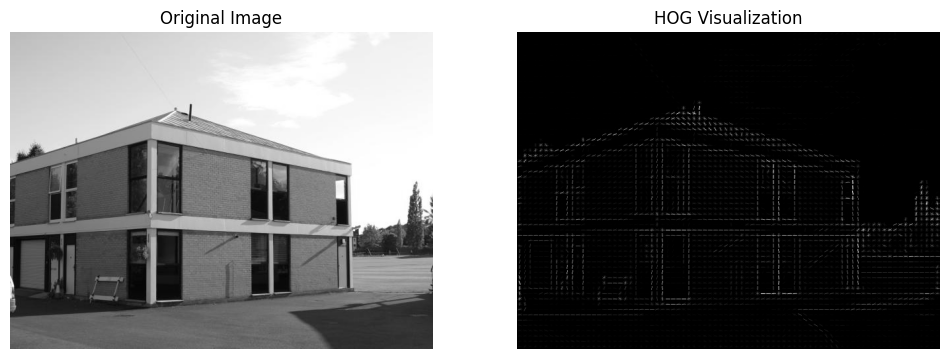

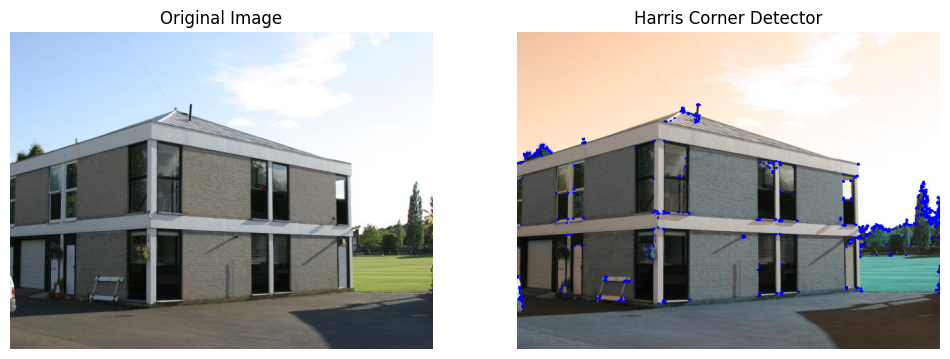

Number of keypoints detected: 682
Shape of descriptor array: (682, 128)


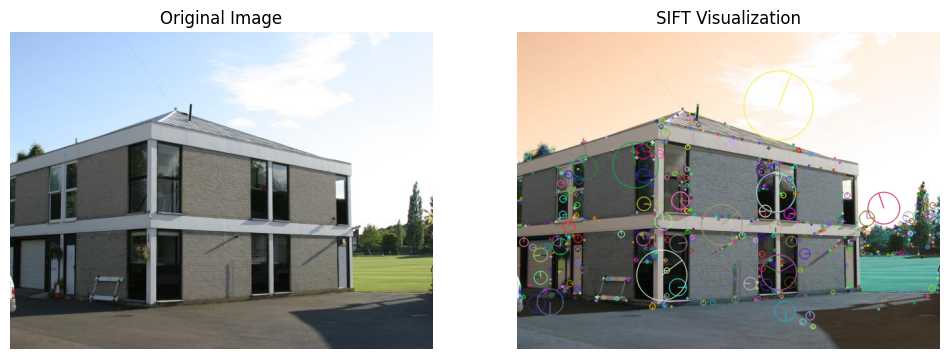

GLCM Properties:
Contrast: [[106.62643779 217.30512838 134.43438479 218.98333448]]
Energy: [[0.07119386 0.06474388 0.06751944 0.06513204]]
Homogeneity: [[0.5992498  0.45578936 0.50528351 0.45789033]]
Correlation: [[0.99125184 0.98217981 0.98897796 0.9820422 ]]


In [54]:
image_path = 'msrcorid/buildings/183_8326.JPG'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


hog_features, hog_image = calculate_HOG(gray_image)
show_HOG(gray_image , hog_image, title='HOG Visualization')


image_with_corners = harris_corner_detector(image)
show_HOG(image, image_with_corners, title='Harris Corner Detector')

sift_image = calculate_SIFT(image)
show_HOG(image, sift_image, title='SIFT Visualization')

calculate_GLCM(gray_image)

